In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# transform = transforms.Compose([transforms.Grayscale(), transforms.Resize((256,256)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

transform = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.ImageFolder('./hotdog/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder('./hotdog/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('hotdog', 'nothotdog')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

%matplotlib inline

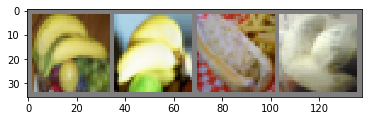

nothotdog nothotdog hotdog nothotdog


In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[label] for label in labels))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
from time import time

epochs = 60
time0 = time()

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(trainloader)))
 
print("Training Time (in minutes): ", (time() - time0)/60)

Epoch 0 - Training loss: 0.6921434550285339
Epoch 1 - Training loss: 0.5663396379053592
Epoch 2 - Training loss: 0.39983688562363384
Epoch 3 - Training loss: 0.3777229942083359
Epoch 4 - Training loss: 0.35573203981295226
Epoch 5 - Training loss: 0.3481510866470635
Epoch 6 - Training loss: 0.3400677194064483
Epoch 7 - Training loss: 0.3290444418918341
Epoch 8 - Training loss: 0.336578759720549
Epoch 9 - Training loss: 0.3294779923944734
Epoch 10 - Training loss: 0.3184817425827496
Epoch 11 - Training loss: 0.31234924323670565
Epoch 12 - Training loss: 0.30515121533628553
Epoch 13 - Training loss: 0.30587300277594476
Epoch 14 - Training loss: 0.29234618752449754
Epoch 15 - Training loss: 0.29756450753100216
Epoch 16 - Training loss: 0.27540239869226935
Epoch 17 - Training loss: 0.2794302984601818
Epoch 18 - Training loss: 0.2704737059655599
Epoch 19 - Training loss: 0.2508464540204732
Epoch 20 - Training loss: 0.24589465454500167
Epoch 21 - Training loss: 0.23274207385357296
Epoch 22 - 

In [8]:
PATH = './hotdog.pth'
torch.save(net.state_dict(), PATH)

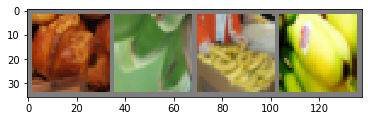

Ground Truth:  hotdog nothotdog nothotdog nothotdog
Predicted:  hotdog nothotdog nothotdog nothotdog


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print("Ground Truth: ", " ".join('%5s' % classes[label] for label in labels))

outputs = net(images)

_, predicted = torch.max(outputs, 1)
print("Predicted: ", " ".join("%5s" % classes[predict] for predict in predicted))

In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 84 %
